# **Seaborn**

seaborn adalah library dari python yang berfungsi untuk melakukan visualisasi pada dataset, dimana seaborn lebih mudah digunakan dari pada Matplotlib.

Seaborn dibuat di atas matplotlib oleh karena itu ada baiknya mempelajari matplotlib terlebih dahulu daripada seaborn.

- Seaborn juga tingkat antarmuka rendah(low) | Matplotlib tingkat antarmuka tinggi (high).
- Seaborn fokus pada visual statistik | Maplotlib fokus pada plotting yang umum digunakan.
- Seaborn lebih terintegrasi dengan Pandas | Matplotlib kurang terintegrasi dengan Pandas.
- Seaborn tidak membutuhkan banyak kode | Maplotlib membutuhkan banyak kode untuk melakukan visualisasi.
- Seaborn tidak bisa dengan bebas mengkostum visual | Matplotlib lebih bebas dalam mengkostum.

# Import Library

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('sampleCarData.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


# Data Cleaning

In [30]:
df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [47]:
df.head(1)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    float64
 10  MPG_City     426 non-null    float64
 11  MPG_Highway  426 non-null    float64
 12  Weight       426 non-null    float64
 13  Wheelbase    426 non-null    float64
 14  Length       426 non-null    float64
dtypes: float64(8), object(7)
memory usage: 53.2+ KB


In [37]:
df['MSRP'] = df['MSRP'].replace({'\$':'', ',':''},regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11852\999713381.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['MSRP'] = df['MSRP'].replace({'\$':'', ',':''},regex=True)


In [38]:
df['MSRP']

0      36945 
1      23820 
2      26990 
3      33195 
4      43755 
        ...  
427    40565 
428    42565 
429    45210 
430    26135 
431    35145 
Name: MSRP, Length: 426, dtype: object

In [48]:
df['MSRP'] = df['MSRP'].astype(int)

In [42]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int64  
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    int64  
 9   Horsepower   426 non-null    float64
 10  MPG_City     426 non-null    float64
 11  MPG_Highway  426 non-null    float64
 12  Weight       426 non-null    float64
 13  Wheelbase    426 non-null    float64
 14  Length       426 non-null    float64
dtypes: float64(7), int64(2), object(6)
memory usage: 53.2+ KB


# Visualization

## 1. Count Plot

**Count Plot** digunakan untuk melihat atau menganalisis dataset yang berbentuk kategori, dimana kita bisa melihat frekuensi (jumlah) dari setiap kategori.

`seaborn.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)`

In [50]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,"$33,337",3.5,6,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,"$21,761",2.0,4,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,"$24,647",2.4,4,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195,"$30,299",3.2,6,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,"$39,014",3.5,6,225.0,18.0,24.0,3880.0,115.0,197.0


In [55]:
df['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

Pada plot berikut kita menampilkan jumlah data dari kolom Type dan dikategorikan lagi berdasarkan kolom Origin menggunakan parameter `hue=`.
Kita juga menggunakan tema visual menggunakan parrrameter `palette=` dengan tema Set2

<Axes: xlabel='Type', ylabel='count'>

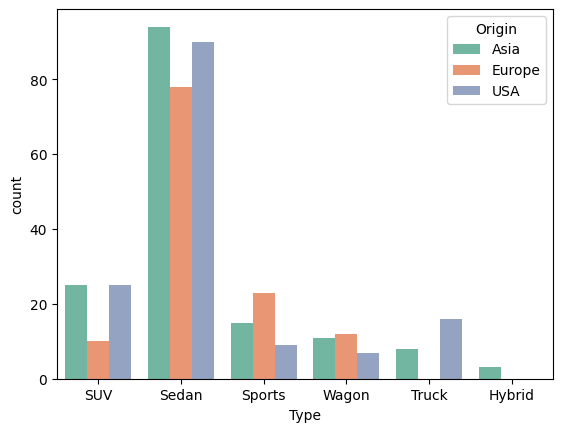

In [36]:
sns.countplot(x='Type', data=df, palette='Set2', hue='Origin')

Dengan menggunaka parameter `order=`, kita bisa memfilter data apa saja yang akan kita tampilkan seperti pada variabel `origin_order` berikut, seharusnya memiliki 3 data tetapi kita memasukkan 2 data saja.
Berlaku juga pada data di sumbu Y menggunakan parm `hue_order=`, kita bisa memfilter, menggunakan data apa saja yg kita gunakan, contoh pada var `type_order` berfungsi untuk data apa yang digunakan.

In [137]:
# order dan hue_order untuk costum kategori apa saja yang akan di tampilkan
type_order = ['SUV', 'Sedan', 'Truck', 'Sports']
origin_order = ['Europe', 'Asia']


<Axes: xlabel='Type', ylabel='count'>

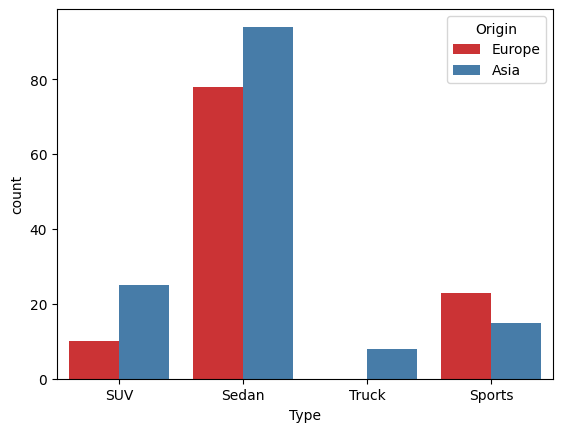

In [35]:
sns.countplot(x='Type', data=df, palette='Set1', order=type_order, hue='Origin', hue_order=origin_order)

In [163]:
# sns.countplot(x='Type', data=df, hue='Origin', palette='Set2_r', linewidth=1, facecolor=(1,1,1,1),edgecolor=sns.color_palette('dark', 3))

## 2. Bar Plots

berbeda dengan counts plot yang hanya bisa melihat count dari variabel saja, di bar plots kita bisa membuat agregasi statistik

# Style

## Color

`Palette=''`
1. Built in Color Palettes
- Sequential: 'Blues', 'Reds', 'Greens'
- Diverging: 'RdBu', 'coolwarm', 'BrBG'
- Qualitative: 'Set1', 'Set2', 'Paired'
2. Format Strings
- 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind'
3. Color Maps dengan Suffix
- Menambahkan _r untuk membalik urutan warna
- Contoh: 'Blues_r', 'Reds_r'
4. Custom Color List
- Gunakan sns.color_palette() untuk melihat preview palette
- Gunakan sns.palplot() untuk menampilkan palette